# Convolutions

Objectives:
- Application of convolution on images

### Reading and opening images

The following code enables to read an image, put it in a numpy array and display it in the notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

sample image shape:  (600, 600, 3)


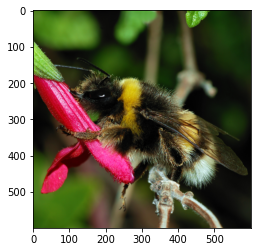

In [2]:
sample_image = imread("bumblebee.png")
sample_image= sample_image.astype("float32")

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

### A simple convolution filter

The goal of this section to use tensorflow / Keras to perform individual convolutions on images. This section does not involve training any model yet.

In [3]:
import tensorflow as tf
print(tf.__version__)

2022-09-21 17:42:55.964895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-21 17:42:55.964971: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [5]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
              input_shape=(None, None, 3))

Remember: in Keras, `None` is used as a marker for tensor dimensions with dynamic size. In this case `batch_size`, `width` and `height` are all dynamic: they can depend on the input. Only the number of input channels (3 colors) has been fixed.

In [6]:
sample_image.shape

(600, 600, 3)

In [7]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 600, 600, 3)

**Questions**: 


If we apply this convolution to this image, what will be the shape of the generated feature map?

Hints:

- in Keras `padding="same"` means that convolutions uses as much padding as necessary so has to preserve the spatial dimension of the input maps or image;

- in Keras, convolutions have no strides by default.

Bonus: how much padding Keras has to use to preserve the spatial dimensions in this particular case?

In [8]:
img_out = conv(img_in)
print(type(img_out), img_out.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 600, 600, 3)


2022-09-21 17:43:14.286283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-21 17:43:14.286352: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-21 17:43:14.286436: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-m2dsupsdlclass-2dlectures-2dlabs-2diep6z5gd): /proc/driver/nvidia/version does not exist
2022-09-21 17:43:14.286951: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The output is a tensorflow Eager Tensor, which can be converted to obtain a standard numpy array:

In [9]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))

<class 'numpy.ndarray'>


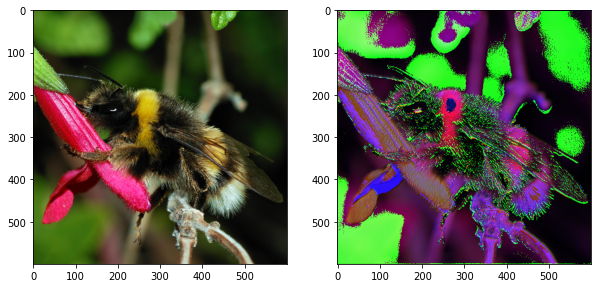

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

The output has 3 channels, hence can also be interpreted as an RGB image with matplotlib. However it is the result of a random convolutional filter applied to the original one.


Let's look at the parameters:

In [11]:
conv.count_params()

228

**Question**: can you compute the number of trainable parameters from the layer hyperparameters?

Hints:

- the input image has 3 colors and a single **convolution kernel** mixes information from all the three input channels to compute its output;

- a **convolutional layer** outputs many channels at once: each channel is the output of a distinct convolution operation (aka unit) of the layer;

- do not forget the biases!

Solution: let's introspect the keras model:

In [12]:
len(conv.get_weights())

2

In [13]:
weights = conv.get_weights()[0]
weights.shape

(5, 5, 3, 3)

Eeach of the 3 output channels is generated by a distinct convolution kernel.

Each convolution kernel has a spatial size of 5x5 and operates across 3 input channels.

In [14]:
biases = conv.get_weights()[1]
biases.shape

(3,)

One bias per output channel.

We can instead build a kernel ourselves, by defining a function which will be passed to `Conv2D` Layer.
We'll create an array with 1/25 for filters, with each channel seperated. 

In [15]:
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

We can display the numpy filters by moving the spatial dimensions in the end (using `np.transpose`):

In [16]:
np.transpose(my_init(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

In [17]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_init)

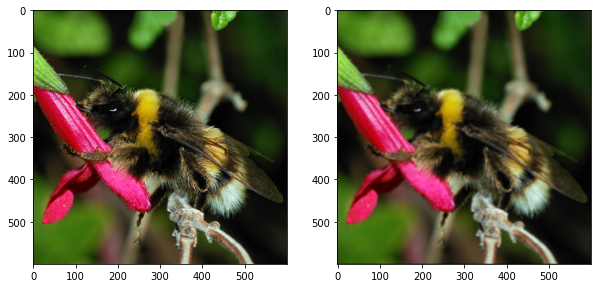

In [18]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

**Exercise**
- Define a Conv2D layer with 3 filters (5x5) that compute the identity function (preserve the input image without mixing the colors).
- Change the stride to 2. What is the size of the output image?
- Change the padding to 'VALID'. What do you observe?

In [19]:
# %load solutions/strides_padding.py

### Working on edge detection on Grayscale image

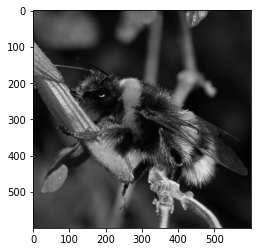

In [20]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# as to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]


# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercise**
- Build an edge detector using `Conv2D` on greyscale image
- You may experiment with several kernels to find a way to detect edges
- https://en.wikipedia.org/wiki/Kernel_(image_processing)

Try `Conv2D?` or press `shift-tab` to get the documentation. You may get help at https://keras.io/layers/convolutional/

In [21]:
# %load solutions/edge_detection

### Pooling and strides with convolutions

**Exercise**
- Use `MaxPool2D` to apply a 2x2 max pool with strides 2 to the image. What is the impact on the shape of the image?
- Use `AvgPool2D` to apply an average pooling.
- Is it possible to compute a max pooling and an average pooling with well chosen kernels?

**Bonus**
- Implement a 3x3 average pooling with a regular convolution `Conv2D`, with well chosen strides, kernel and padding

In [22]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

In [23]:
# %load solutions/pooling.py

In [24]:
# %load solutions/average_as_conv.py